In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [40]:
df = pd.read_csv('diabetes.csv')

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
df.duplicated().sum()

0

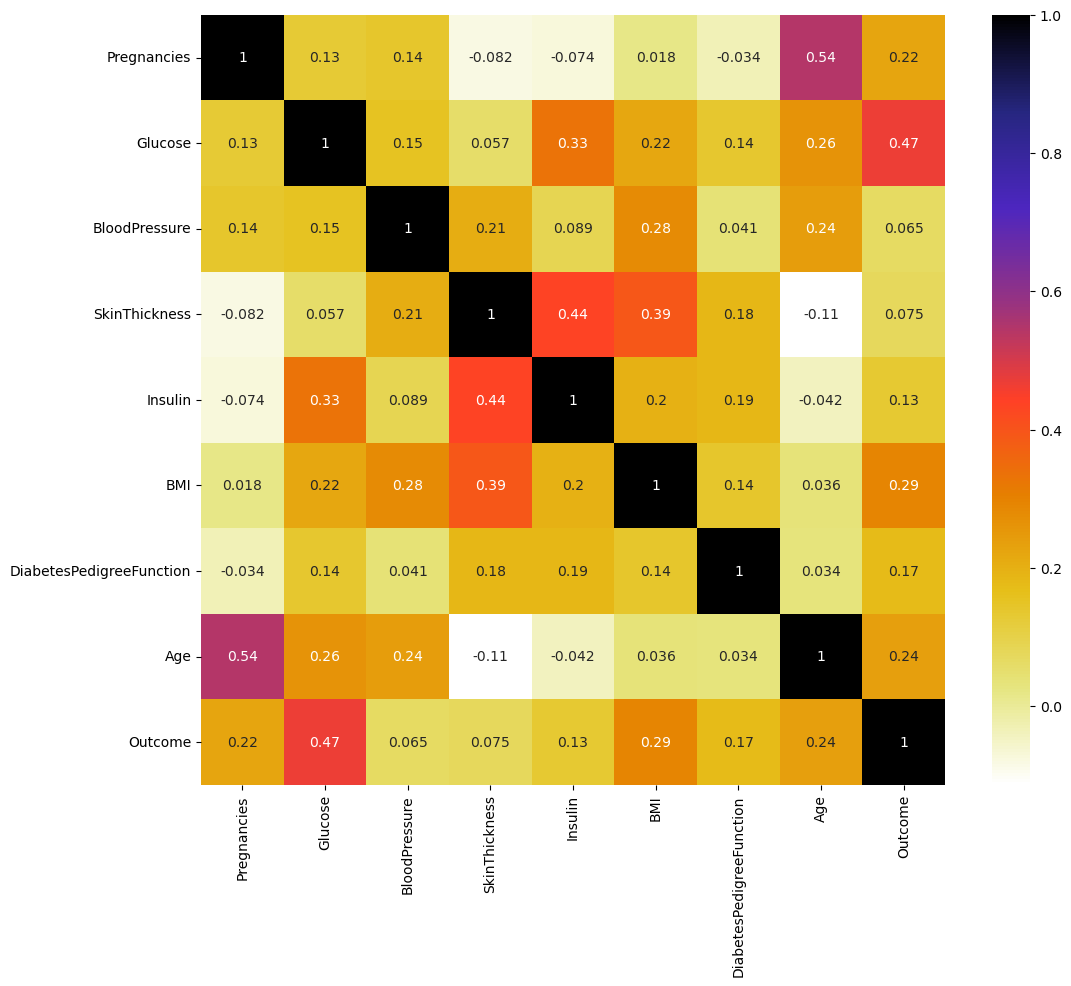

In [44]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [45]:
df = df.drop(columns=['SkinThickness','BloodPressure'],axis=1)
df.duplicated().sum()

0

In [46]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


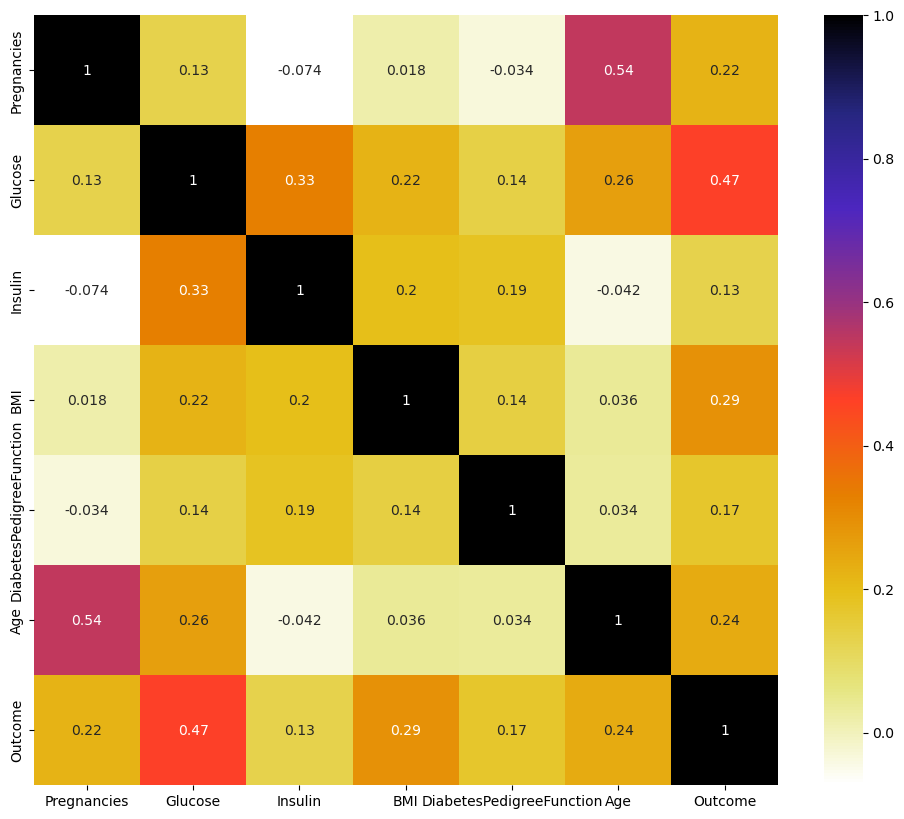

In [47]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [48]:
cols=['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

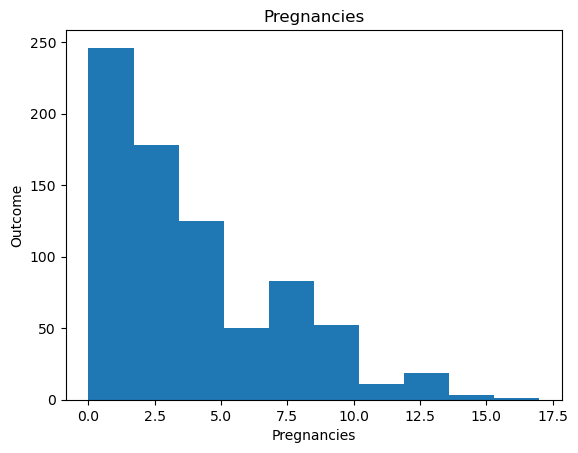

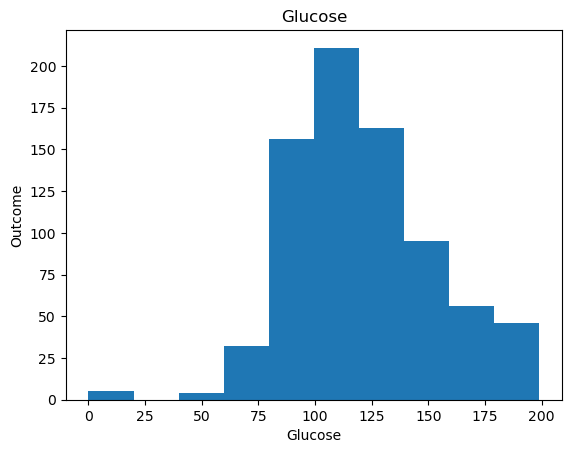

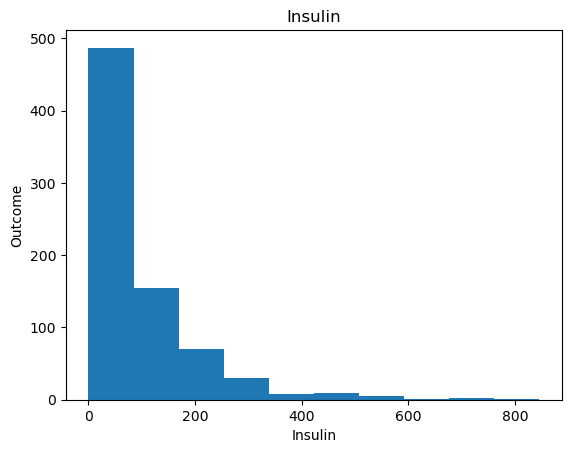

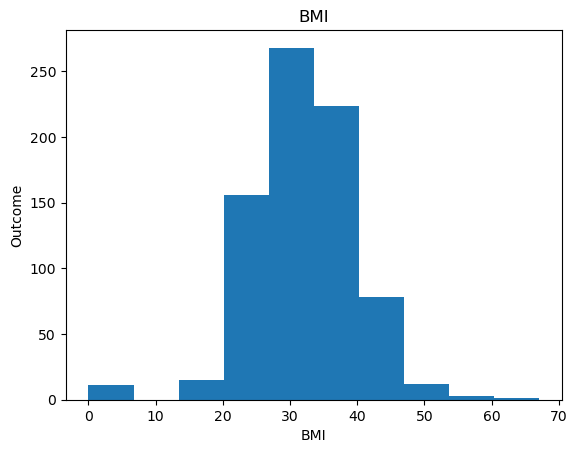

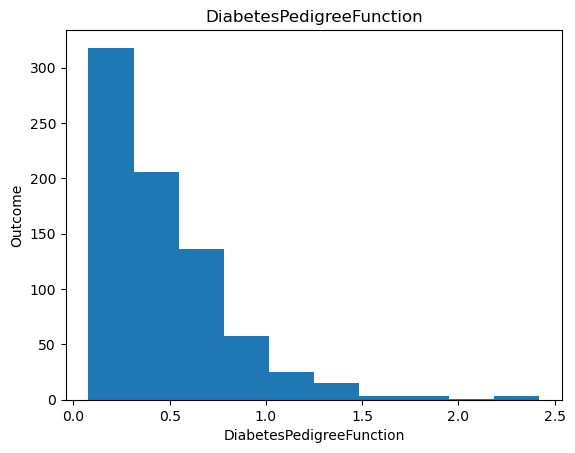

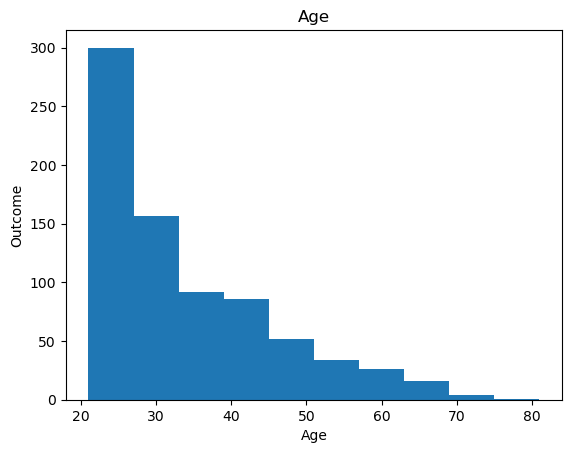

In [49]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

In [50]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

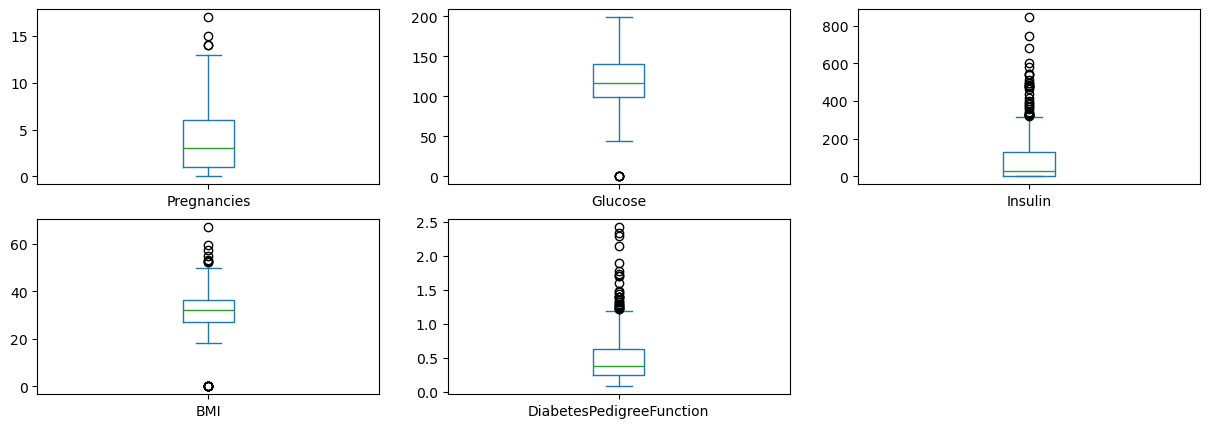

In [51]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [52]:
def clean_outlier(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [53]:
df = clean_outlier('Pregnancies',[14,15,17],df)
df = clean_outlier('Glucose',[0],df)
df = clean_outlier('BMI',[0],df)

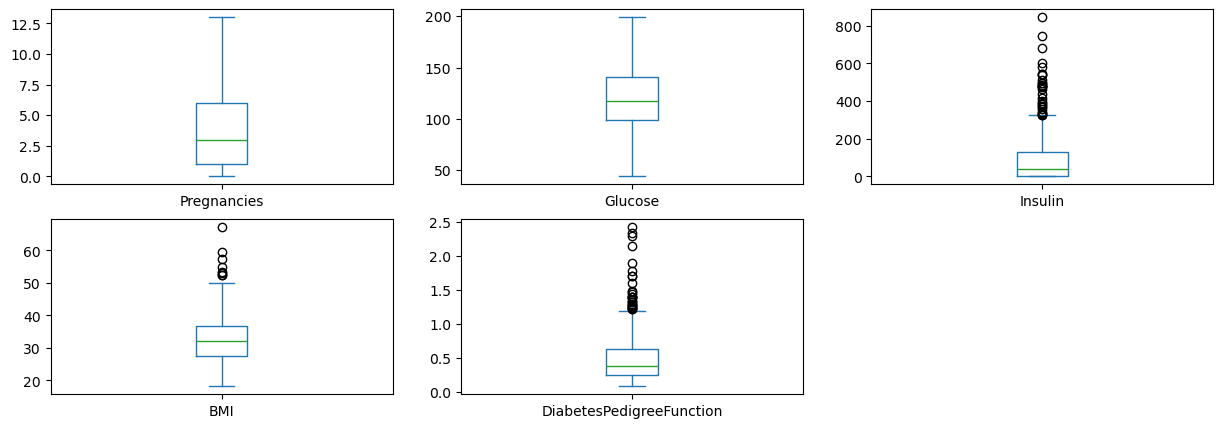

In [54]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

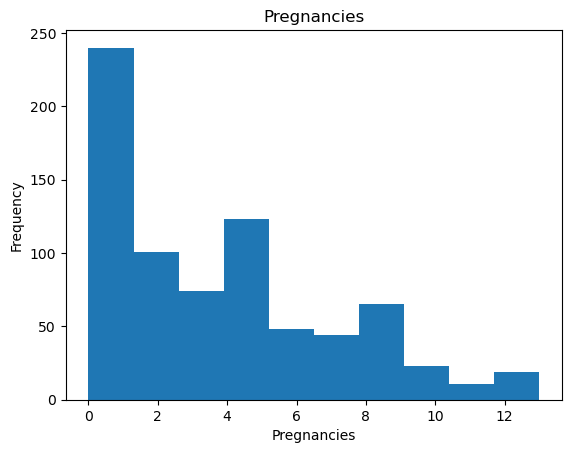

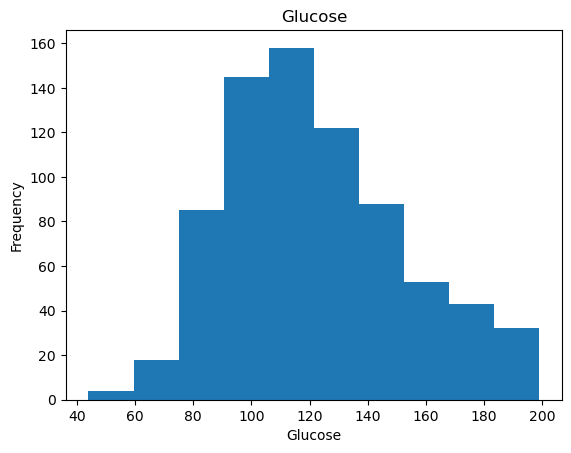

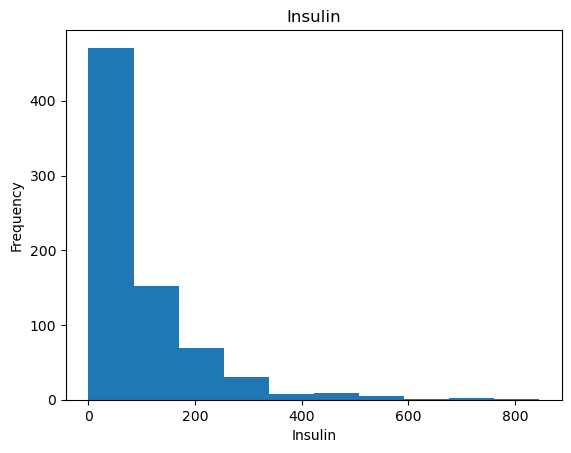

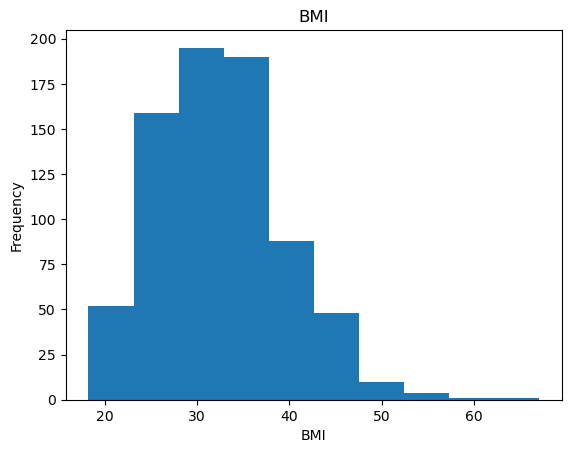

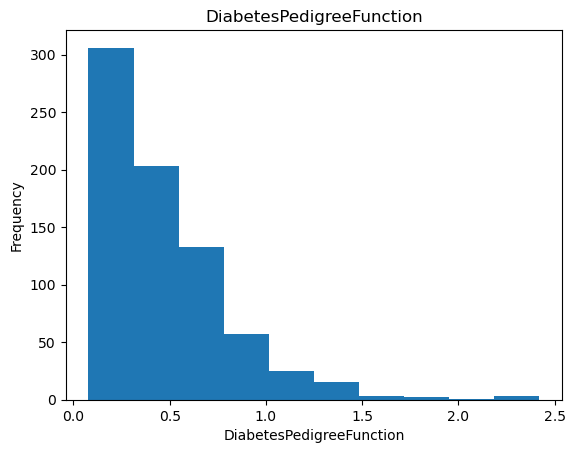

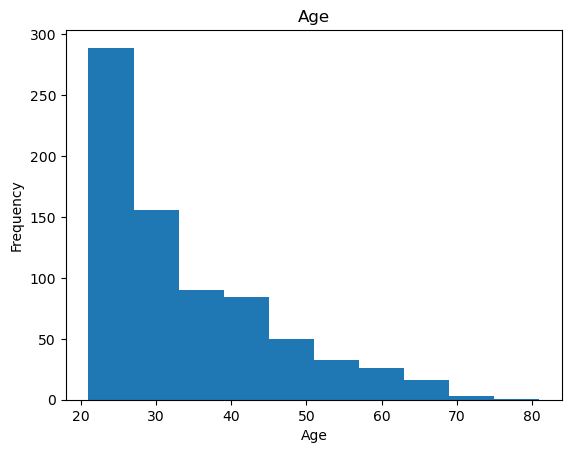

In [55]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Frequency')
    plt.xlabel(label)
    plt.show()

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 2.5649493574615367] is not finite

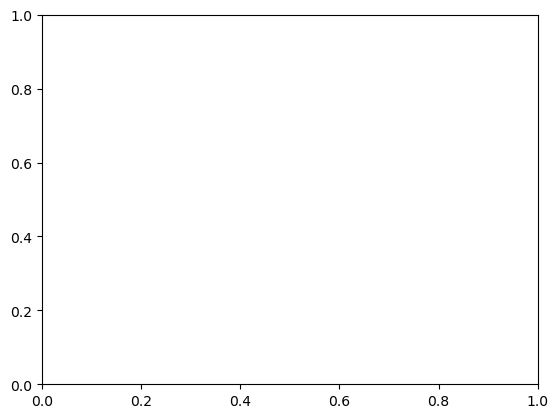

In [56]:
plt.hist(np.log(df['Pregnancies']))
plt.title('Pregnancies')
plt.ylabel('Frequency')
plt.xlabel('Pregnancies')
plt.show()